In [7]:
import pandas as pd

from mcs_prime import McsTracks, McsTrack, PATHS

In [3]:
tracks = McsTracks.open(PATHS['statsdir'] / 'mcs_tracks_final_extc_20190101.0000_20200101.0000.nc', 
                        PATHS['pixeldir'])

In [4]:
tracks.dstracks

<xarray.Dataset>
Dimensions:                  (tracks: 32843, times: 400, mergers: 50, nmaxpf: 3)
Coordinates:
  * tracks                   (tracks) int64 0 1 2 3 ... 32839 32840 32841 32842
  * times                    (times) int64 0 1 2 3 4 5 ... 395 396 397 398 399
  * mergers                  (mergers) int64 0 1 2 3 4 5 6 ... 44 45 46 47 48 49
  * nmaxpf                   (nmaxpf) int64 0 1 2
Data variables: (12/55)
    track_duration           (tracks) int32 ...
    start_status             (tracks) float64 ...
    end_status               (tracks) float64 ...
    start_basetime           (tracks) datetime64[ns] 2019-01-01T00:30:00 ... ...
    end_basetime             (tracks) datetime64[ns] 2019-01-02T12:30:00 ... ...
    start_split_cloudnumber  (tracks) float64 ...
    ...                       ...
    pf_mcsstatus             (tracks, times) float64 ...
    movement_distance        (tracks, times) float32 ...
    movement_speed           (tracks, times) float32 ...
    movement_theta           (tracks, times) float32 ...
    movement_distance_x      (tracks, times) float32 ...
    movement_distance_y      (tracks, times) float32 ...
Attributes: (12/23)
    Title:                       Statistics of each MCS track
    Institution:                 Pacific Northwest National Laboratory
    Contact:                     Zhe Feng, zhe.feng@pnnl.gov
    Created_on:                  Mon Feb 28 05:50:54 2022
    startdate:                   20190101.0000
    enddate:                     20200101.0000
    ...                          ...
    PF_PF_min_majoraxis_thresh:  20
    coefs_pf_area:               [2874.05    89.825]
    coefs_pf_rr:                 [3.01657   0.0144461]
    coefs_pf_skew:               [0.194462  0.0100072]
    coefs_pf_heavyratio:         [3.419024 0.438709]
    max_speed_thresh:            50

In [8]:
track_start_times = pd.DatetimeIndex(tracks.dstracks.start_basetime.values)

In [9]:
track_start_times

DatetimeIndex(['2019-01-01 00:30:00', '2019-01-01 00:30:00',
               '2019-01-01 00:30:00', '2019-01-01 00:30:00',
               '2019-01-01 00:30:00', '2019-01-01 00:30:00',
               '2019-01-01 00:30:00', '2019-01-01 00:30:00',
               '2019-01-01 00:30:00', '2019-01-01 00:30:00',
               ...
               '2019-12-31 15:30:00', '2019-12-31 15:30:00',
               '2019-12-31 15:30:00', '2019-12-31 15:30:00',
               '2019-12-31 16:30:00', '2019-12-31 16:30:00',
               '2019-12-31 16:30:00', '2019-12-31 16:30:00',
               '2019-12-31 17:30:00', '2019-12-31 18:30:00'],
              dtype='datetime64[ns]', length=32843, freq=None)

In [20]:
lst_offset = tracks.dstracks.meanlon.values[:, 0] / 360 * 24 * 3600 * 1e3

In [25]:
lst_track_start_times = track_start_times + lst_offset.astype('timedelta64[ms]')

In [26]:
lst_track_start_times[:10]

DatetimeIndex(['2018-12-31 12:55:14.612000', '2018-12-31 19:17:34.090000',
               '2018-12-31 15:46:21.194000', '2019-01-01 11:54:09.028000',
               '2018-12-31 14:05:40.492000', '2018-12-31 15:38:48.072000',
               '2019-01-01 07:52:54.624000', '2018-12-31 14:23:40.068000',
               '2019-01-01 02:19:02.346000', '2019-01-01 07:59:18.066000'],
              dtype='datetime64[ns]', freq=None)

In [27]:
track_start_times[:10]

DatetimeIndex(['2019-01-01 00:30:00', '2019-01-01 00:30:00',
               '2019-01-01 00:30:00', '2019-01-01 00:30:00',
               '2019-01-01 00:30:00', '2019-01-01 00:30:00',
               '2019-01-01 00:30:00', '2019-01-01 00:30:00',
               '2019-01-01 00:30:00', '2019-01-01 00:30:00'],
              dtype='datetime64[ns]', freq=None)

In [32]:
tracks.dstracks.meanlon.values[:10, 0]

array([-173.68912 ,  -78.107956, -130.9117  ,  171.03761 , -156.08128 ,
       -132.79971 ,  110.72759 , -151.58307 ,   27.259775,  112.32528 ],
      dtype=float32)

In [29]:
tracks.dstracks.meanlon.values[:10, 0] / 360 * 24

array([-11.579274 ,  -5.207197 ,  -8.727447 ,  11.402508 , -10.405418 ,
        -8.853313 ,   7.3818398, -10.105537 ,   1.8173184,   7.488352 ],
      dtype=float32)

In [33]:
lst_track_start_times.hour

Int64Index([12, 19, 15, 11, 14, 15,  7, 14,  2,  7,
            ...
            10,  4, 12, 11, 13, 13, 12, 12, 10, 21],
           dtype='int64', length=32843)

In [38]:
[(i, (lst_track_start_times.hour == i).sum()) for i in range(24)]

[(0, 1335),
 (1, 1257),
 (2, 1174),
 (3, 1110),
 (4, 1086),
 (5, 1061),
 (6, 1073),
 (7, 1072),
 (8, 982),
 (9, 1106),
 (10, 1192),
 (11, 1500),
 (12, 1898),
 (13, 2114),
 (14, 1830),
 (15, 1494),
 (16, 1451),
 (17, 1468),
 (18, 1514),
 (19, 1584),
 (20, 1440),
 (21, 1416),
 (22, 1419),
 (23, 1267)]

In [39]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [40]:
twilight = mpl.colormaps['twilight']

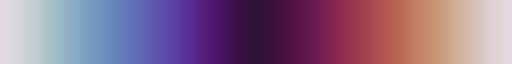

In [41]:
twilight

In [43]:
twilight(1)

(0.8837852019553906, 0.8507294054031063, 0.8872322209694989, 1.0)